# Homework 1

Name: Jasper Fan-Chiang \
Github ID: jasperfc \
USC ID: 3084465291

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Vertebral Column Data Set

### (a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

### (b) Pre-Processing and Exploratory data analysis:

#### 1. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

In [2]:
df = pd.read_csv('column_2C.dat', header = None, sep= " ")
df.columns = ["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius", "grade of spondylolisthesis", "class labels"]
df.loc[df["class labels"] == "AB", "class labels"] = 1
df.loc[df["class labels"] == "NO", "class labels"] = 0

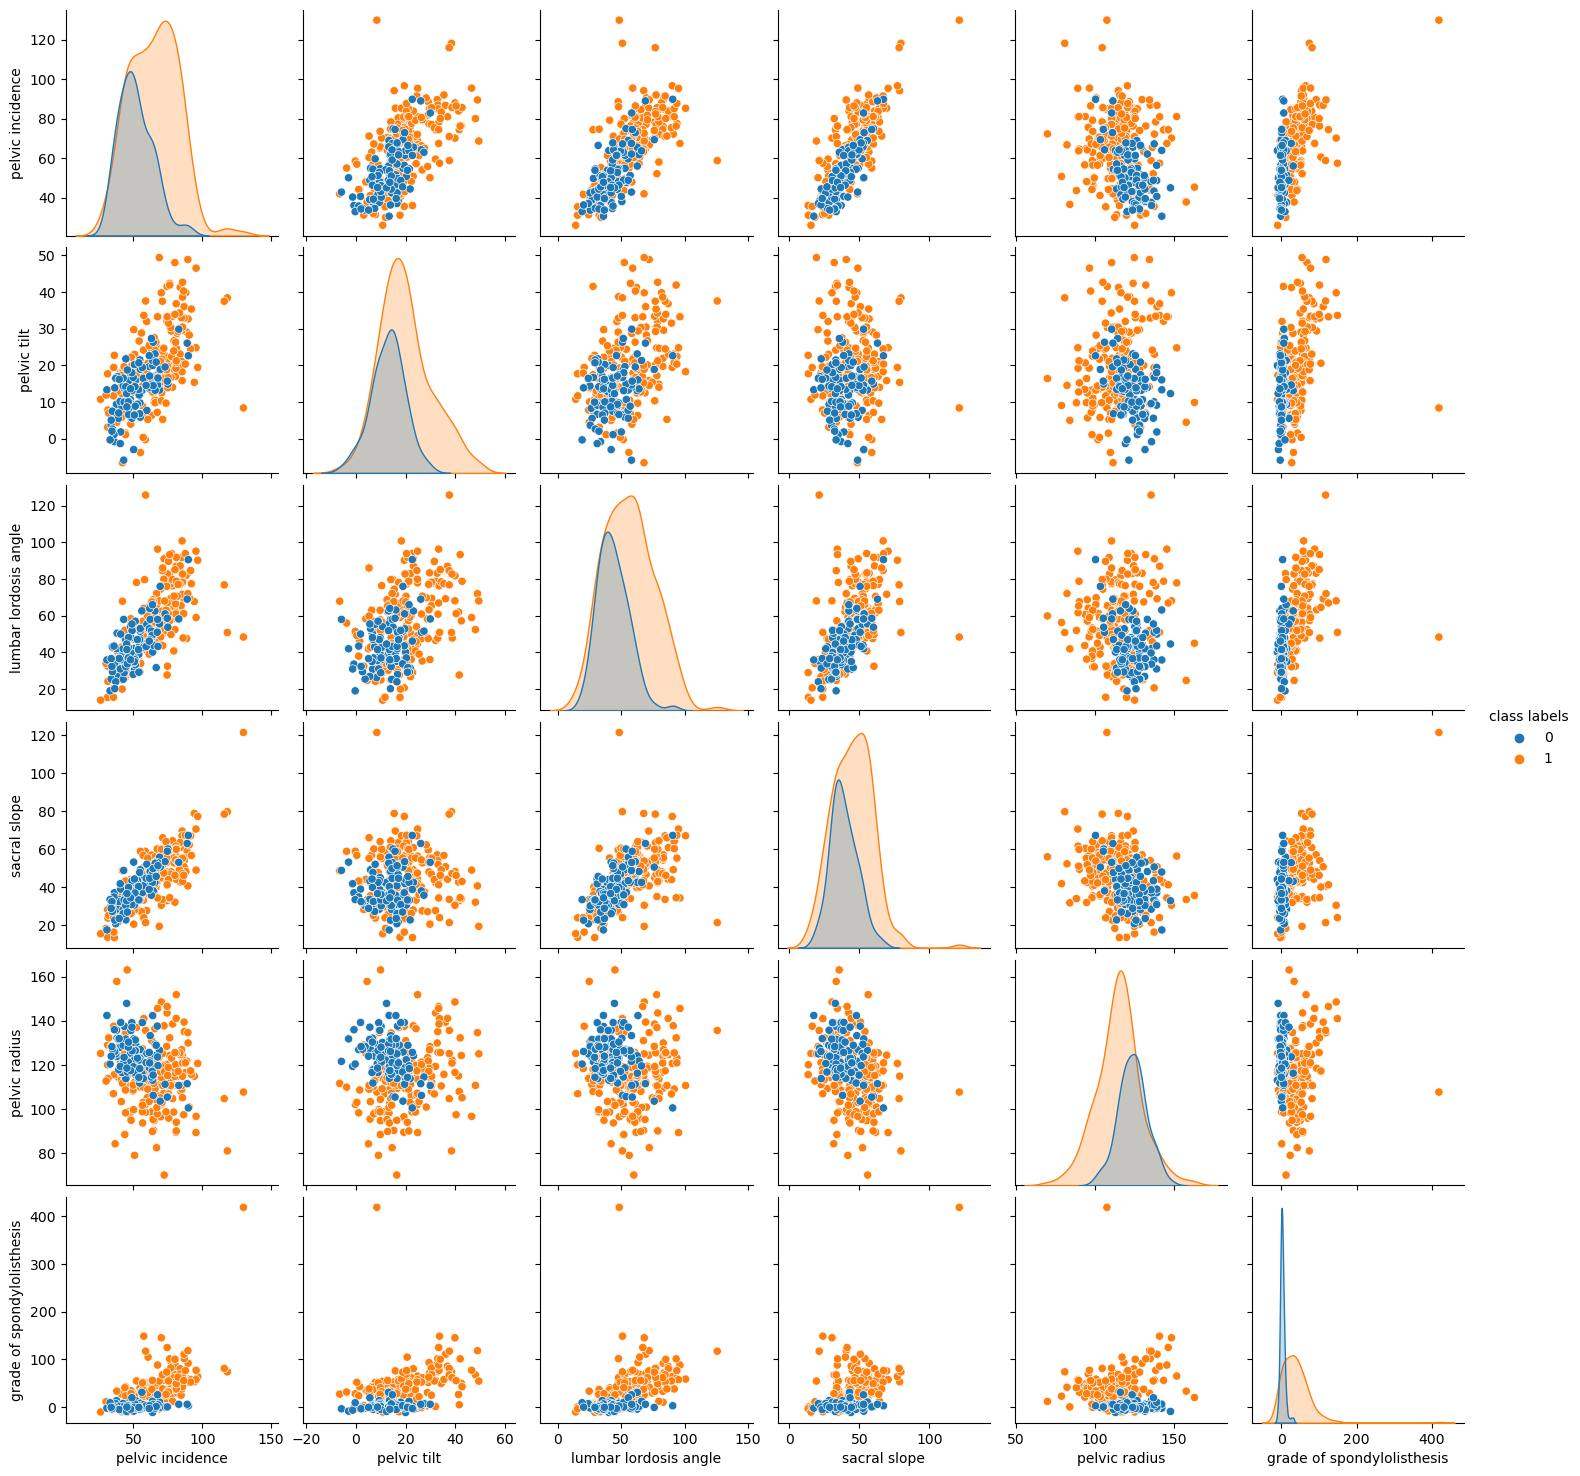

In [3]:
sns.pairplot(
    df,
    x_vars=["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius", "grade of spondylolisthesis"],
    y_vars=["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius", "grade of spondylolisthesis"],
    hue = "class labels"
);
plt.show()

#### 2. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

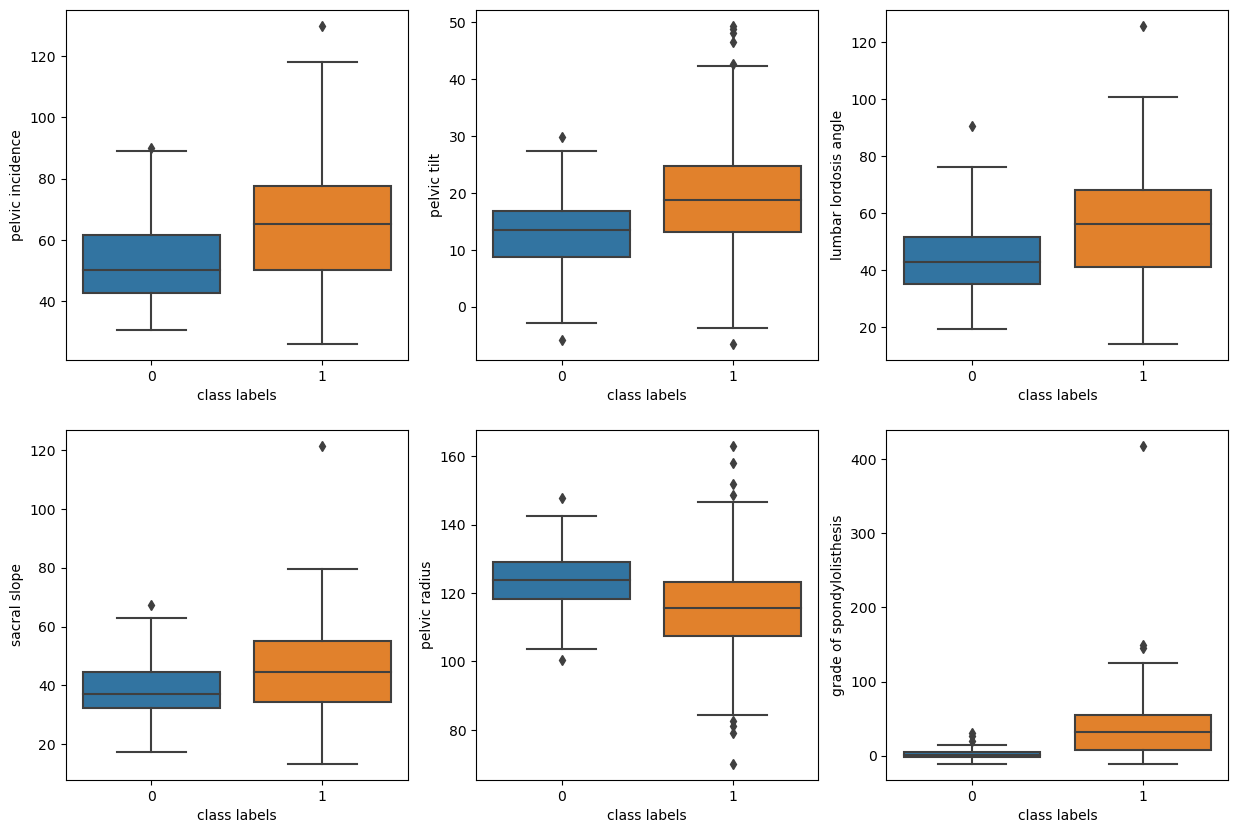

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(x = "class labels", y = "pelvic incidence", data = df, ax=axes[0][0])
sns.boxplot(x = "class labels", y = "pelvic tilt", data = df, ax=axes[0][1])
sns.boxplot(x = "class labels", y = "lumbar lordosis angle", data = df, ax=axes[0][2])
sns.boxplot(x = "class labels", y = "sacral slope", data = df, ax=axes[1][0])
sns.boxplot(x = "class labels", y = "pelvic radius", data = df, ax=axes[1][1])
sns.boxplot(x = "class labels", y = "grade of spondylolisthesis", data = df, ax=axes[1][2])
plt.show()

#### 3. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [5]:
df_class0_train = df[df["class labels"] == 0][:70].reset_index(drop=True)
df_class0_test = df[df["class labels"] == 0][70:].reset_index(drop=True)
df_class1_train = df[df["class labels"] == 1][:140].reset_index(drop=True)
df_class1_test = df[df["class labels"] == 1][140:].reset_index(drop=True)

train = np.concatenate((df_class0_train, df_class1_train))
test = np.concatenate((df_class0_test, df_class1_test))

print(f"Training set: {len(train)}")
print(f"Testing set: {len(test)}")

train_labels = train[:, -1].tolist() 
train_set = train[:, :6].tolist()
test_labels = test[:, -1].tolist()
test_set = test[:, :6].tolist()

Training set: 210
Testing set: 100


### (c) Classification using KNN on Vertebral Column Data Set

#### 1. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)
k = 5
knn = KNeighborsClassifier(n_neighbors = k, p = 2, metric = 'euclidean')
knn.fit(train_set, train_labels)

KNeighborsClassifier(metric='euclidean')

#### 2. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smallerincrements of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision,and F1-score when k = k∗2.


In [7]:
train_error_lst = []
test_error_lst = []
best_k = 0
min_test_error = float("inf")

for k in range(208, 0, -3):
    knn = KNeighborsClassifier(n_neighbors = k, p = 2, metric='euclidean')
    knn.fit(train_set, train_labels)
    
    train_pred = knn.predict(train_set)
    train_error = 1 - accuracy_score(train_labels, train_pred)
    train_error_lst.append(train_error)
    
    test_pred = knn.predict(test_set)
    test_error = 1 - accuracy_score(test_labels, test_pred)
    if test_error <= min_test_error:
        min_test_error = test_error
        best_k = k
    test_error_lst.append(test_error)
    
print(f"The most suitable k = {best_k}, and the minimum testing error = {round(min_test_error, 2)}")

The most suitable k = 4, and the minimum testing error = 0.06


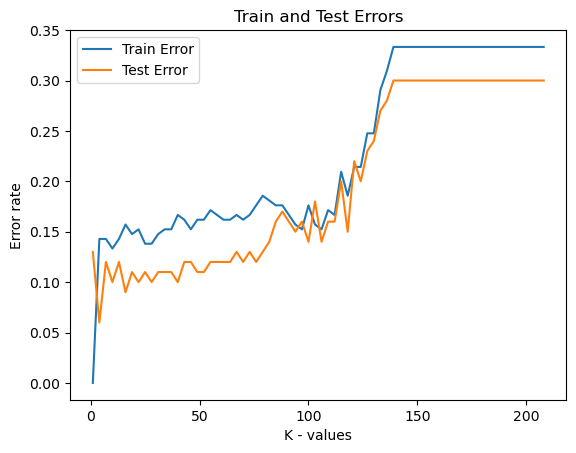

In [8]:
x = range(208, 0, -3)
plt.plot(x, train_error_lst, label = "Train Error")
plt.plot(x, test_error_lst, label = "Test Error")
plt.title("Train and Test Errors")
plt.ylabel("Error rate")
plt.xlabel("K - values")
plt.legend()
plt.show()

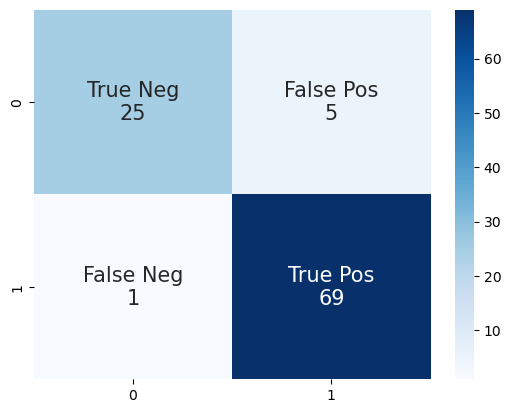

True Positive Rate: 0.986
True Negative Rate: 0.833
Precision: 0.932
F1-score: 0.958


In [9]:
knn_best = KNeighborsClassifier(n_neighbors = best_k, p = 2, metric='euclidean')
knn_best.fit(train_set, train_labels)

test_pred_best = knn_best.predict(test_set)

confusion = confusion_matrix(test_labels, test_pred_best)
tn, fp, fn, tp = confusion.ravel()

labels = [f"True Neg\n{tn}", f"False Pos\n{fp}", f"False Neg\n{fn}", f"True Pos\n{tp}"]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion, annot=labels, fmt="", annot_kws={"size": 15}, cmap='Blues')

plt.show()

true_positive_rate = tp / (tp + fn)
print(f"True Positive Rate: {round(true_positive_rate, 3)}")

true_negative_rate = tn / (tn + fp)
print(f"True Negative Rate: {round(true_negative_rate, 3)}")

precision = tp / (tp + fp)
print(f"Precision: {round(precision, 3)}")

F1_score =  (2 * precision * true_positive_rate) / (precision + true_positive_rate)
print(f"F1-score: {round(F1_score, 3)}")

#### 3. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, 3 which is obtained by some value of k, against the size of training set, when the  size of training set is N ∈ {10, 20, 30, . . . , 210}. 4 Note: for each N, select your training set by choosing the first bN/3c rows of Class 0 and the first N − bN/3c rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

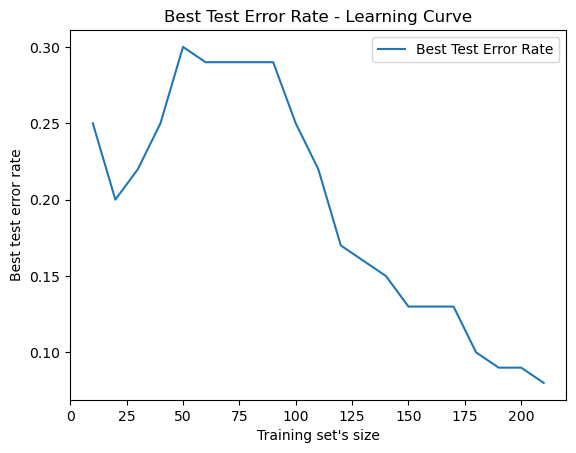

In [30]:
error_lst = []
train_n_error_lst = []
for n in range(10, len(train)+1, 10):
    class0_n = n // 3
    class1_n = n - class0_n
    train_class0 = df_class0_train.head(class0_n)
    train_class1 = df_class1_train.head(class1_n)
    train_n = np.concatenate((train_class0, train_class1))
    train_n_set = train_n[:, :6].tolist()
    train_n_labels = train_n[:, -1].tolist()
    
    best_n_k = 0
    min_test_n_error = float("inf")
    
    for k in range(1, n, 5):
        knn_n = KNeighborsClassifier(n_neighbors = k, p = 2, metric='euclidean')
        knn_n.fit(train_n_set, train_n_labels)
        
        train_n_pred = knn_n.predict(train_set)
        train_n_error = 1 - accuracy_score(train_labels, train_n_pred)
        train_n_error_lst.append(train_n_error)
        
        test_n_pred = knn_n.predict(test_set)
        test_n_error = 1 - accuracy_score(test_labels, test_n_pred)
        if test_n_error <= min_test_n_error:
            min_test_n_error = test_n_error
            best_n_k = k
    error_lst.append(min_test_n_error)

x = range(10, len(train)+1, 10)
plt.plot(x, error_lst, label = "Best Test Error Rate")
plt.title("Best Test Error Rate - Learning Curve")
plt.xlabel("Training set's size")
plt.ylabel("Best test error rate")
plt.legend()
plt.show()

### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

#### 1. Minkowski Distance:

##### A. which becomes Manhattan Distance with p = 1.

Best k list = [6, 11, 26]
Best k = 6
Lowest error rate = 0.11


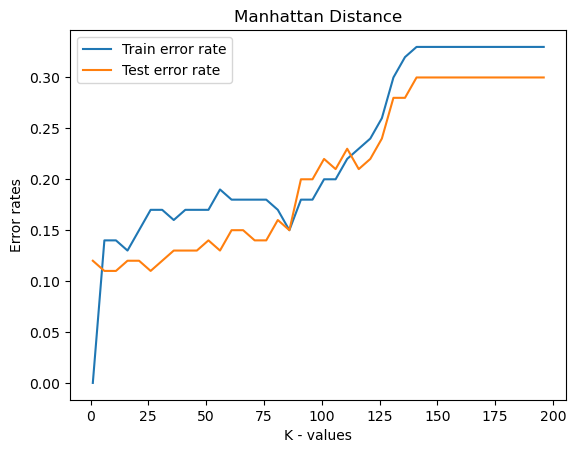

In [11]:
best_m_k = 0
min_test_m_error = float("inf")
test_error_m_lst = []
train_error_m_lst = []
best_m_k_lst = []

for k in range(1, 200, 5):
    knn_m = KNeighborsClassifier(n_neighbors = k, p = 1, metric='manhattan')
    knn_m.fit(train_set, train_labels)
    
    train_m_pred = knn_m.predict(train_set)
    train_m_error = 1 - accuracy_score(train_labels, train_m_pred)
    train_error_m_lst.append(round(train_m_error, 2))
    
    test_m_pred = knn_m.predict(test_set)
    test_m_error = 1 - accuracy_score(test_labels, test_m_pred)
    if test_m_error < min_test_m_error:
        min_test_m_error = test_m_error
        best_m_k_lst = []
        best_m_k_lst.append(k)
    elif test_m_error == min_test_m_error:
        best_m_k_lst.append(k)
        
    test_error_m_lst.append(round(test_m_error, 2))

    
print(f"Best k list = {best_m_k_lst}")
print(f"Best k = {min(best_m_k_lst)}")    
print(f"Lowest error rate = {min(test_error_m_lst)}")

x = range(1, 200, 5)
plt.plot(x, train_error_m_lst, label = "Train error rate")
plt.plot(x, test_error_m_lst, label = "Test error rate")
plt.title("Manhattan Distance")
plt.xlabel("K - values")
plt.ylabel("Error rates")
plt.legend()
plt.show()

##### B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

Best p list = [3.9810717055349722]
The best p value is 3.981
The best log10(p) value is 0.6
The min error rate is 0.06


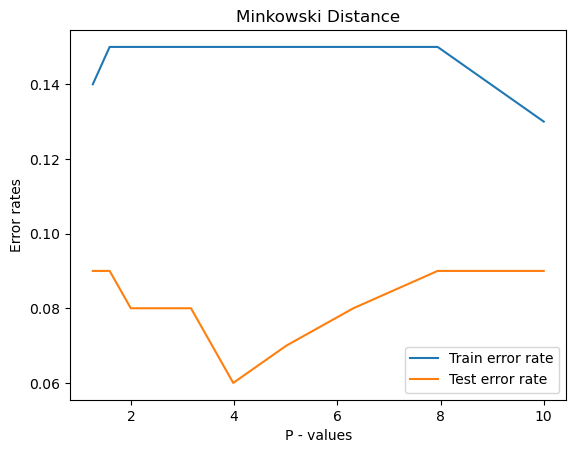

In [34]:
p_arr = np.logspace(0.1, 1, 10)
train_p_error_lst = []
test_p_error_lst = []
best_p_lst = []
min_test_p_error = float("inf")
for p_value in p_arr:
    knn_p = KNeighborsClassifier(n_neighbors = min(best_m_k_lst), p = p_value, metric='minkowski')
    knn_p.fit(train_set, train_labels)
    
    train_p_pred = knn_p.predict(train_set)
    train_p_error = 1 - accuracy_score(train_labels, train_p_pred)
    train_p_error_lst.append(round(train_p_error, 2))
    
    test_p_pred = knn_p.predict(test_set)
    test_p_error = 1 - accuracy_score(test_labels, test_p_pred)
    test_p_error_lst.append(test_p_error)

    if test_p_error < min_test_p_error:
        min_test_p_error = test_p_error
        best_p_lst = []
        best_p_lst.append(p_value)
    elif test_p_error == min_test_p_error:
        best_p_lst.append(p_value)

    
print(f"Best p list = {best_p_lst}")
print(f"The best p value is {round(min(best_p_lst), 3)}")
print(f"The best log10(p) value is {np.log10(best_p_lst)[0]}")
print(f"The min error rate is {round(min(test_p_error_lst), 4)}")

x = p_arr
plt.plot(x, train_p_error_lst, label = "Train error rate")
plt.plot(x, test_p_error_lst, label = "Test error rate")
plt.title("Minkowski Distance")
plt.xlabel("P - values")
plt.ylabel("Error rates")
plt.legend()
plt.show()

##### C. which becomes Chebyshev Distance with p → ∞

Best k list = [16]
Best k = 16
Lowest error rate = 0.08


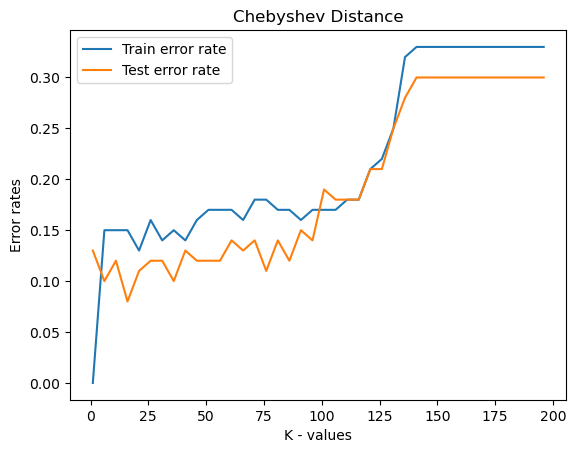

In [13]:
best_c_k_lst = []
min_test_c_error = float("inf")
test_error_c_lst = []
train_error_c_lst = []

for k in range(1, 200, 5):
    knn_c = KNeighborsClassifier(n_neighbors = k, metric='chebyshev')
    knn_c.fit(train_set, train_labels)
    
    train_c_pred = knn_c.predict(train_set)
    train_c_error = 1 - accuracy_score(train_labels, train_c_pred)
    train_error_c_lst.append(round(train_c_error, 2))
    
    test_c_pred = knn_c.predict(test_set)
    test_c_error = 1 - accuracy_score(test_labels, test_c_pred)
        
    if test_c_error < min_test_c_error:
        min_test_c_error = test_c_error
        best_c_k_lst = []
        best_c_k_lst.append(k)
    elif test_c_error == min_test_c_error:
        best_c_k_lst.append(k)
    test_error_c_lst.append(round(test_c_error, 2))
        
print(f"Best k list = {best_c_k_lst}")
print(f"Best k = {min(best_c_k_lst)}")
print(f"Lowest error rate = {min(test_error_c_lst)}")

x = range(1, 200, 5)
plt.plot(x, train_error_c_lst, label = "Train error rate")
plt.plot(x, test_error_c_lst, label = "Test error rate")
plt.title("Chebyshev Distance")
plt.xlabel("K - values")
plt.ylabel("Error rates")
plt.legend()
plt.show()

#### ii. Mahalanobis Distance

Best k list = [1, 6]
Since k = 1 is the first candidate, I choose the next one
Best k = 6
Lowest error rate = 0.17


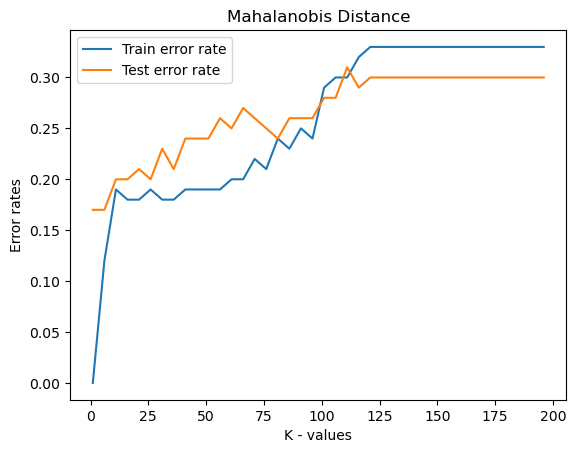

In [14]:
best_ma_k_lst = []
min_test_ma_error = float("inf")
test_error_ma_lst = []
train_error_ma_lst = []

for k in range(1, 200, 5):
    knn_ma = KNeighborsClassifier(n_neighbors = k, metric='mahalanobis', metric_params={'VI': np.linalg.pinv(np.cov(train_set, rowvar=False))})
    knn_ma.fit(train_set, train_labels)
    
    train_ma_pred = knn_ma.predict(train_set)
    train_ma_error = 1 - accuracy_score(train_labels, train_ma_pred)
    train_error_ma_lst.append(round(train_ma_error, 2))
    
    test_ma_pred = knn_ma.predict(test_set)
    test_ma_error = 1 - accuracy_score(test_labels, test_ma_pred)
    if test_ma_error < min_test_ma_error:
        min_test_ma_error = test_ma_error
        best_ma_k_lst = []
        best_ma_k_lst.append(k)
    elif test_ma_error == min_test_ma_error:
        best_ma_k_lst.append(k)
    test_error_ma_lst.append(round(test_ma_error, 2))
        
print(f"Best k list = {best_ma_k_lst}")
print("Since k = 1 is the first candidate, I choose the next one")
print(f"Best k = {best_ma_k_lst[1]}")
print(f"Lowest error rate = {min(test_error_ma_lst)}")

x = range(1, 200, 5)
plt.plot(x, train_error_ma_lst, label = "Train error rate")
plt.plot(x, test_error_ma_lst, label = "Test error rate")
plt.title("Mahalanobis Distance")
plt.xlabel("K - values")
plt.ylabel("Error rates")
plt.legend()
plt.show()

### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

Euclidean Distance's best k list = [6]
Euclidean Distance's best k = 6
Euclidean Distance's lowest error rate = 0.1


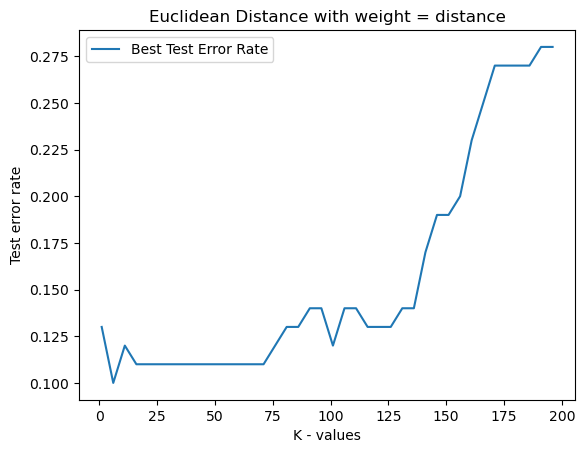

In [15]:
error_lst_d = []
best_n_k_lst_d = []
train_error_lst_d = []
min_test_n_error_d = float("inf")

for k in range(1, 200, 5):
    knn_n_d = KNeighborsClassifier(n_neighbors = k, p = 2, metric='euclidean', weights = "distance")
    knn_n_d.fit(train_set, train_labels)
    
    train_n_pred_d = knn_n_d.predict(train_set)
    train_n_error_d = 1 - accuracy_score(train_labels, train_n_pred_d)
    train_error_lst_d.append(train_n_error_d)
    
    test_n_pred_d = knn_n_d.predict(test_set)
    test_n_error_d = 1 - accuracy_score(test_labels, test_n_pred_d)
    if test_n_error_d < min_test_n_error_d:
        min_test_n_error_d = test_n_error_d
        best_n_k_lst_d = []
        best_n_k_lst_d.append(k)
    elif test_n_error_d == min_test_n_error_d:
        best_n_k_lst_d.append(k)
    error_lst_d.append(test_n_error_d)

print(f"Euclidean Distance's best k list = {best_n_k_lst_d}")
print(f"Euclidean Distance's best k = {min(best_n_k_lst_d)}")    
print(f"Euclidean Distance's lowest error rate = {round(min(error_lst_d), 2)}")    
    
x = range(1, 200, 5)
plt.plot(x, error_lst_d, label = "Best Test Error Rate")
plt.title("Euclidean Distance with weight = distance")
plt.xlabel("K - values")
plt.ylabel("Test error rate")
plt.legend()
plt.show()

Manhattan Distance's best k list = [26]
Manhattan Distance's best k = 26
Manhattan Distance's lowest error rate = 0.1


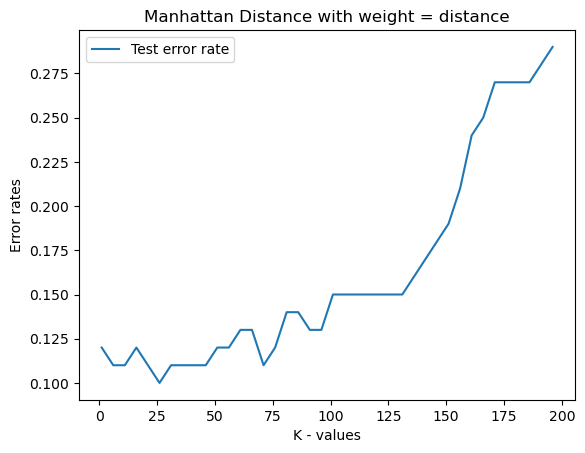

In [16]:
best_m_k_d = 0
min_test_m_error_d = float("inf")
test_error_m_lst_d = []
train_error_m_lst_d = []
best_m_k_lst_d = []

for k in range(1, 200, 5):
    knn_m_d = KNeighborsClassifier(n_neighbors = k, p = 1, metric='manhattan', weights = "distance")
    knn_m_d.fit(train_set, train_labels)
 
    train_m_pred_d = knn_m_d.predict(train_set)
    train_m_error_d = 1 - accuracy_score(train_labels, train_m_pred_d)
    train_error_m_lst_d.append(train_m_error_d)

    test_m_pred_d = knn_m_d.predict(test_set)
    test_m_error_d = 1 - accuracy_score(test_labels, test_m_pred_d)
    if test_m_error_d < min_test_m_error_d:
        min_test_m_error_d = test_m_error_d
        best_m_k_lst_d = []
        best_m_k_lst_d.append(k)
    elif test_m_error_d == min_test_m_error_d:
        best_m_k_lst_d.append(k)
        
    test_error_m_lst_d.append(round(test_m_error_d, 2))

    
print(f"Manhattan Distance's best k list = {best_m_k_lst_d}")
print(f"Manhattan Distance's best k = {min(best_m_k_lst_d)}")    
print(f"Manhattan Distance's lowest error rate = {min(test_error_m_lst_d)}")

x = range(1, 200, 5)
plt.plot(x, test_error_m_lst_d, label = "Test error rate")
plt.title("Manhattan Distance with weight = distance")
plt.xlabel("K - values")
plt.ylabel("Error rates")
plt.legend()
plt.show()

Best k list = [16, 31, 36, 41, 61]
Best k = 16
Lowest error rate = 0.11


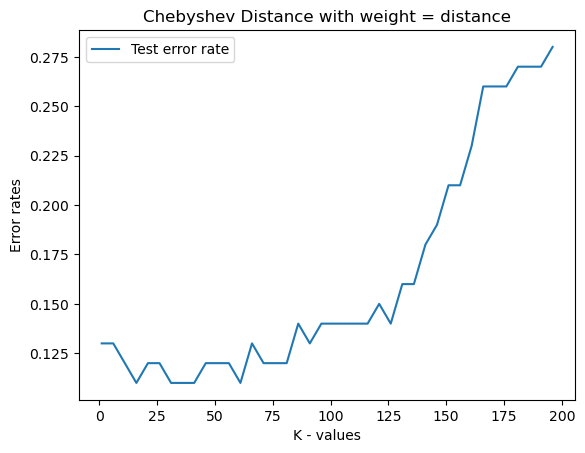

In [17]:
best_c_k_lst_d = []
min_test_c_error_d = float("inf")
test_error_c_lst_d = []
train_error_c_lst_d = []

for k in range(1, 200, 5):
    knn_c_d = KNeighborsClassifier(n_neighbors = k, metric='chebyshev', weights = "distance")
    knn_c_d.fit(train_set, train_labels)
    
    train_c_pred_d = knn_c_d.predict(train_set)
    train_c_error_d = 1 - accuracy_score(train_labels, train_c_pred_d)
    train_error_c_lst_d.append(train_c_error_d)
    
    test_c_pred_d = knn_c_d.predict(test_set)
    test_c_error_d = 1 - accuracy_score(test_labels, test_c_pred_d)
        
    if test_c_error_d < min_test_c_error_d:
        min_test_c_error_d = test_c_error_d
        best_c_k_lst_d = []
        best_c_k_lst_d.append(k)
    elif test_c_error_d == min_test_c_error_d:
        best_c_k_lst_d.append(k)
    test_error_c_lst_d.append(round(test_c_error_d, 2))
        
print(f"Best k list = {best_c_k_lst_d}")
print(f"Best k = {min(best_c_k_lst_d)}")
print(f"Lowest error rate = {min(test_error_c_lst_d)}")

x = range(1, 200, 5)
plt.plot(x, test_error_c_lst_d, label = "Test error rate")
plt.title("Chebyshev Distance with weight = distance")
plt.xlabel("K - values")
plt.ylabel("Error rates")
plt.legend()
plt.show()

### (f) What is the lowest training error rate you achieved in this homework?

In [23]:
# Euclidean
print(f"Lowest training error for Euclidean: {min(train_error_lst)}")
# Euclidean with different size of training set
print(f"Lowest training error for Euclidean with different size of training set: {min(train_n_error_lst)}")
# Manhattan
print(f"Lowest training error for Manhattan: {min(train_error_m_lst)}")
# Minkowski log10(p)
print(f"Lowest training error for Minkowski log10(p): {min(train_p_error_lst)}")
# Chebyshev
print(f"Lowest training error for Chebyshev: {min(train_error_c_lst)}")
# Mahalanobis
print(f"Lowest training error for Mahalanobis: {min(train_error_ma_lst)}")
# Euclidean with weights = distance
print(f"Lowest training error for Euclidean with weights = distance: {min(train_error_lst_d)}")
# Manhattan with weights = distance
print(f"Lowest training error for Manhattan with weights = distance: {min(train_error_m_lst_d)}")
# Chebyshev with weights = distance
print(f"Lowest training error for Chebyshev with weights = distance: {min(train_error_c_lst_d)}")

lowest_error_rate = [min(train_error_lst), min(train_n_error_lst), min(train_error_m_lst), min(train_p_error_lst),
                     min(train_error_c_lst), min(train_error_ma_lst), min(train_error_lst_d), min(train_error_m_lst_d), min(train_error_c_lst_d)]
print(f"The lowest training error rate in this homework will be {min(lowest_error_rate)}")

Lowest training error for Euclidean: 0.0
Lowest training error for Euclidean with different size of training set: 0.0
Lowest training error for Manhattan: 0.0
Lowest training error for Minkowski log10(p): 0.13
Lowest training error for Chebyshev: 0.0
Lowest training error for Mahalanobis: 0.0
Lowest training error for Euclidean with weights = distance: 0.0
Lowest training error for Manhattan with weights = distance: 0.0
Lowest training error for Chebyshev with weights = distance: 0.0
The lowest training error rate in this homework will be 0.0
